

>  ## ***`Task 2: Build a Simple Linear Regression Model`*** ##
 
---
```Description:```

` Build a linear regression model to predict
 a continuous variable (e.g., house prices).`



---
```Objectives:```

```
1.   Load a dataset and preprocess it.
2.   Train a linear regression model using scikit-learn.
3.   Interpret the model coefficients.
4.   Evaluate the model using R-squared and mean squared
     error (MSE).
```

---


`Tools: Python, pandas, scikit-learn.`

`Using house prices dataset.`

### ***1- Import pre-processing libs*** ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### ***2- Import and Load Data*** ###

In [2]:
df = pd.read_csv(r'D:\Abdelraouf\Quran\Codveda-ML-Internship\DataSet-For-Tasks\4_House-Prediction-Data-Set.csv')

In [3]:
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


### ***3- Exploring Data*** ###

In [4]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [5]:
df.tail()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...
504,0.04741 0.00 11.930 0 0.5730 6.0300 80...


In [6]:
df.sample(3)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
19,1.25179 0.00 8.140 0 0.5380 5.5700 98...
327,0.06617 0.00 3.240 0 0.4600 5.8680 25...
120,0.07165 0.00 25.650 0 0.5810 6.0040 84...


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB
None


In [8]:
df.shape

(505, 1)

In [9]:
df.describe()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.02731 0.00 7.070 0 0.4690 6.4210 78...
freq,1


### ***4-Finding & Handle missing data*** ###

In [10]:
df.isnull()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,False
1,False
2,False
3,False
4,False
...,...
500,False
501,False
502,False
503,False


In [11]:
df.isnull().sum()

0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64

In [12]:
df.isna().any()

0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    False
dtype: bool

### ***5- Checking duplicated values*** ###

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
500    False
501    False
502    False
503    False
504    False
Length: 505, dtype: bool

In [14]:
df.duplicated().sum()

0

### ***6_ Naming Columns of Data*** ###

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [16]:
df = pd.read_csv(
    r'D:\Abdelraouf\Quran\Codveda-ML-Internship\DataSet-For-Tasks\4_House-Prediction-Data-Set.csv',
    delim_whitespace=True,
    header=None
)
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df.columns = columns

| Abbreviation | Full Feature Name                                                         |
| ------------ | ------------------------------------------------------------------------- |
| **CRIM**     | Per Capita Crime Rate by Town                                             |
| **ZN**       | Proportion of Residential Land Zoned for Large Lots (over 25,000 sq.ft.)  |
| **INDUS**    | Proportion of Non-Retail Business Acres per Town                          |
| **CHAS**     | Charles River Dummy Variable (1 if tract bounds river; 0 otherwise)       |
| **NOX**      | Concentration of Nitric Oxides (parts per 10 million)                     |
| **RM**       | Average Number of Rooms per Dwelling                                      |
| **AGE**      | Proportion of Owner-Occupied Units Built Before 1940                      |
| **DIS**      | Weighted Distance to Five Boston Employment Centers                       |
| **RAD**      | Index of Accessibility to Radial Highways                                 |
| **TAX**      | Full-Value Property-Tax Rate per \$10,000                                 |
| **PTRATIO**  | Pupil-to-Teacher Ratio by Town                                            |
| **B**        | Index: 1000 × (Bk - 0.63)², where Bk is the Proportion of Black Residents |
| **LSTAT**    | Percentage of Lower Status of the Population                              |
| **MEDV**     | Median Value of Owner-Occupied Homes (in \$1000s)                         |


In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [18]:
# drop CHAS column
df.drop('CHAS', axis=1, inplace=True)

In [19]:
df.shape

(506, 13)

### ***7_ Scaling Data*** ###

In [20]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [22]:
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### ***8_ Feature & Target Selection*** ###

In [23]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [24]:
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [25]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### ***9_ Spliting the dataset into the Training set and Test set*** ###

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

### ***10_ Train and Test Linear Regression Model*** ###

In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [29]:
print(f"The score of train model is: {lr_model.score(X_train, y_train):.2f} %")

The score of train model is: 0.75 %


In [30]:
print(f"The score of test model is: {lr_model.score(X_test, y_test):.2f} %")

The score of test model is: 0.66 %


### ***11_ Interpret the model coefficients.*** ###

In [31]:
y_pred = lr_model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
print(f"Slope (Coefficient): {lr_model.coef_[0]}")
print(f"Intercept: {lr_model.intercept_}")
print(f"Mean Squared Error (MSE): {mse}")


Slope (Coefficient): -0.1191897645319805
Intercept: 30.101279866905095
Mean Squared Error (MSE): 24.635394156373717


In [33]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.6640648675861218


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


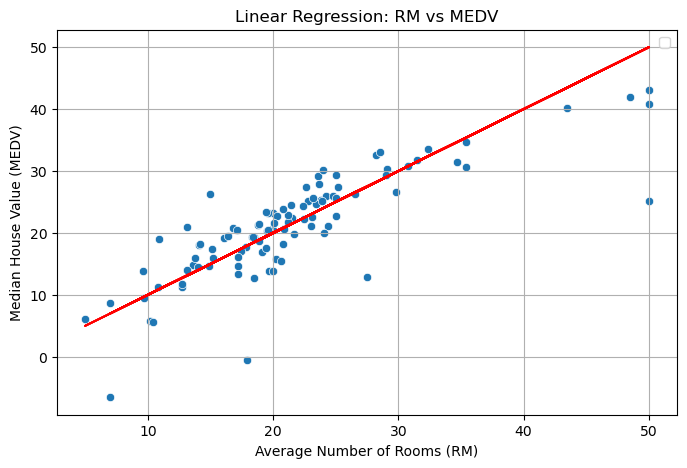

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.title('Linear Regression: RM vs MEDV')
plt.legend()
plt.grid(True)
plt.show()


---

## ***`Conclusion`*** ##

**In this notebook, we built a simple linear regression model to predict house prices using the Boston Housing dataset. The key steps included:**

---

```
1. Loaded the dataset and assigned appropriate column names.
2. Explored the data for missing values and duplicates, confirming data integrity.
3. Dropped irrelevant features (e.g., 'CHAS') to focus on relevant predictors.
4. Standardized the numerical features using `StandardScaler` for better model performance.
5. Split the data into training and testing sets to evaluate model generalization.
6. Trained a linear regression model using scikit-learn.
7. Evaluated the model using R-squared and Mean Squared Error (MSE).
8. Visualized the actual vs. predicted values to interpret model performance.
```

---

**These steps ensured the data was properly prepared and the model was evaluated effectively, providing a solid foundation for further machine learning tasks.**